### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


**(1) What is the independent variable? What is the dependent variable?**

The independent variable is the condition of the word set: congruent (the words displayed match the color of the words) or incongruent (the words displayed do not match the color of the words). The dependent variable is the time it takes for the user to read the word set. 

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

Because I am interested to see if it takes more time to read an incongruent word set as compared to an congruent word set, I will perform a one tailed test. At this moment, a one tailed paired sample t-test seems most appropriate. By choosing a one tailed test I accept the possibility to overlook an effect where it takes significantly less time to read the incongruent word set as compare to the congruent word set. 

The two sample sets are paired because the measurement is performed on the same persons twice, only the condition (congruency) was different. This means that we are interested in establishing if the true mean difference between the reading time for the congruent words and the reading time for incongruent words is smaller than 0. The null hypothesis states that the mean reading time for ingruent words and the reading time for congruent words is the same, which means a mean difference of zero. 

Or:

$$H_0: \mu_{d} = 0$$


$$H_1: \mu_{d} < 0$$

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [122]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [123]:
#Load and preview data
stroop = pd.read_csv('stroopdata.csv')
print(stroop.head())
print(stroop.info())

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None


In [124]:
#Get descriptive statistics for the Stroop experiment data
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


When comparing the descriptive statistics for both samples, we can see that the mean reading time for the congruent word set (14 seconds) is -as expected- lower than the mean reading time for the incongruent word set (22 seconds). We will have to test if this difference in means is significant. The median (50% in the table above) for the congruent words is almost the same as the mean. The median for the incongruent words is a little lower than the mean, which indicates that the distribution is slightly skewed to the right.

The range (maximum minus minimum value) for the congruent wordset is smaller (13.7 seconds) than for the incongruent wordset (19.6 seconds). This corresponds with the standard deviation, which is smaller (i.e. the values cluster more closely around the mean) for the congruent wordset than for the incongruent wordset.

**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

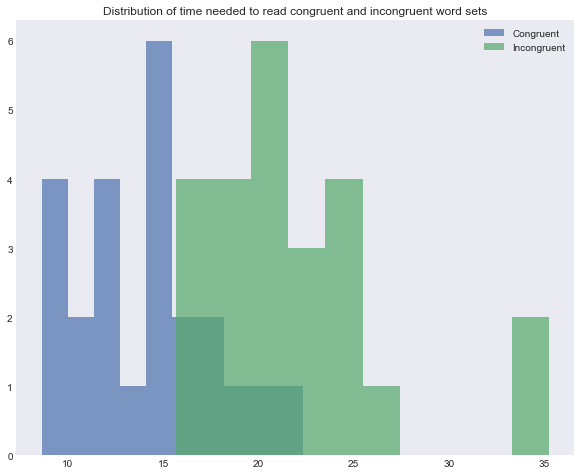

In [125]:
#Create histograms for both the congruent and incongruent words reading times
x = stroop['Congruent']
y = stroop['Incongruent']

sns.set_style("dark")
fig = plt.subplots(figsize=(10,8))
plt.hist(x, bins=10, label='Congruent', alpha=0.7)
plt.hist(y, bins=10, label='Incongruent', alpha=0.7)
plt.title("Distribution of time needed to read congruent and incongruent word sets")
plt.legend(loc='upper right')

In [126]:
#Create new column in dataframe with the differences in reading time for the congruent versus the incongruent words
stroop['Difference'] = stroop['Congruent'] - stroop['Incongruent']
stroop.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


Text(0.5,1,'Boxplot of time needed to read congruent and incongruent word sets and the differences between them')

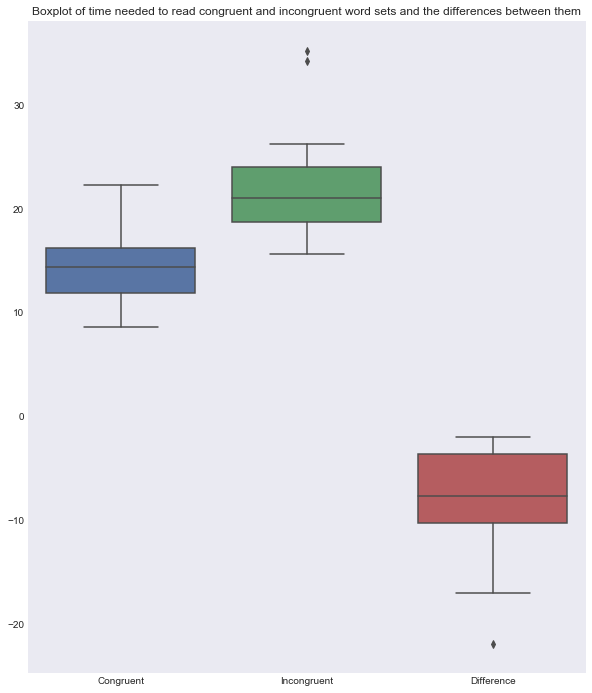

In [127]:
#Create boxplot for congruent and incongruent reading times and the differences between them
sns.set_style("dark")
fig = plt.subplots(figsize=(10,12))
ax = sns.boxplot(data=stroop)
plt.title("Boxplot of time needed to read congruent and incongruent word sets and the differences between them")

Text(0.5,1,'Histogram of differences between reading time')

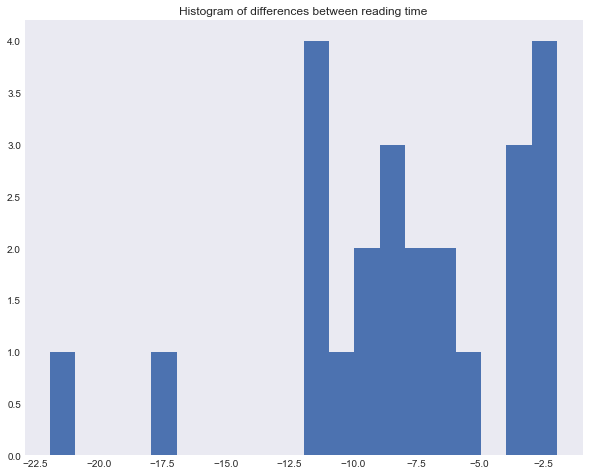

In [128]:
#Create histogram for the differences in reading time between congruent and incongruent word sets
sns.set_style("dark")
fig = plt.subplots(figsize=(10,8))
plt.hist(stroop['Difference'], bins=20, label="Difference")
plt.title("Histogram of differences between reading time")

Looking at the distribution of the both samples, we can see clearly that both distributions are not on top of each other. This can be seen even clearer in the boxplot: the middle 50% scores for the congruent words do not overlap the middle 50% scores for the incongruent words. Furthermore, the boxplot shows that the skewness of the incongruent sample is caused by two outliers (two values around 35 seconds, both lie more than 1.5 times the interquartile range above the highest (Q3) whisker ). The congruent sample does not have any outliers. 

In order to perform a paired sample t-test, we must test if the differences between the pairs of values are distributed normally. The histogram of the differences shows that this is probably not the case, as can also be seen in the Q-Q plot below.

Text(0.5,1,'Stroop Experiment Difference Q-Q Plot')

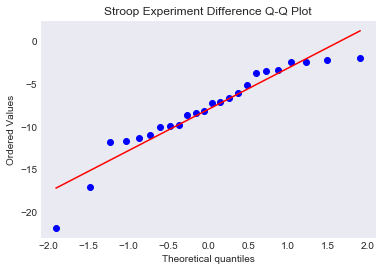

In [129]:
#Create Q-Q plot to visualize normality of distribution of differences
stats.probplot(stroop['Difference'], plot= plt)
plt.title('Stroop Experiment Difference Q-Q Plot')

In [130]:
#Test for normality of the differences in reading time, tests the null hypothesis 
#that a sample comes from a normal distribution
z, pval = stats.mstats.normaltest(stroop["Difference"])

if(pval < 0.05):
    print("This is probably not a normal distribution")
    
print(z, pval)

This is probably not a normal distribution
7.531697890987548 0.02314795254148134


**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**

In [131]:
# Perform the statistical test here
stats.wilcoxon(stroop['Congruent'], stroop['Incongruent'])
#Running the test on the column "Difference" will return the same results - stats.wilcoxon(stroop['Difference'])

WilcoxonResult(statistic=0.0, pvalue=1.821529714896801e-05)

The confidence level I chose was 95% with an alpha of 0.05. This confidence level is most commonly used, and although I do not like a type I error to happen this experiment is not a matter of life and death. When testing a new drug, for example, you would probably choose a lower alpha value.  

Although I planned to perform a one tailed paired sample t-test, I chose not use this test because two assumptions for the paired sample t-test were violated: the dependent variable (differences in reading time) is not normally distributed and the dependent variable does contain outliers. 

Therefore, I performed a Wilcoxon Signed Rank Test which tests whether the distribution of the differences congruent - incongruent is symmetric about zero. It is a non-parametric version of the paired T-test. This test returns a p-value that is much lower than the alpha level of 0.05. Please note that this p-value is the two-sided p-value while we are performing a one tailed test here. Dividing the p-value by 2 returns an even lower p-value. Therefore, we reject the null hypothesis that the true mean difference between the reading time for the congruent words and the reading time for incongruent words is 0.

This result matches with my expectation (and own experience) that it would on average take longer to read the incongruent word set as compared to the congruent word set. 

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

The “Stroop Effect” was named after John Ridley Stroop who discovered this occurrence in the 1930’s. His experiments showed that the action of reading was automatic for most people. He demonstrated that when the brain was instructed to do the opposite and pay more attention to the colour of a word it struggled. His participants had to intentionally adjust their responses to complete the new task, as it is not as familiar to us as reading is. This phenomenon is called 'interference'.

Two different theories have been proposed to explain this phenomenon:
+ Selective attention theory: According to this theory, naming the actual color of the words requires much more attention than simply reading the text.
+ Speed of processing theory: This theory states that people can read words much faster than they can name colors. The speed at which we read makes it much more difficult to name the color of the word after we've read the word.

Perhaps marketing is the field where the Stroop Effect is most widely used. Stroop's experiments suggested that the human brain is not always in charge of its own responses to stimuli. This implied strongly that the brain was wired to respond to words on a page more significantly than to any other factor about a product. One method of marketing that uses the Stroop Effect might be the attachment of a direct and powerful word like "revolutionary" to what, in reality, is a fairly minor change in a product. The point is to exaggerate the change -- for example, a new shape of a car's gear shifter -- and focus the viewer's attention on the word "revolutionary." If the word is more important than its context, then the word can, so to speak, cover over the reality of what is being described. The word, therefore, becomes more significant than the reality being described.

There are situations where the Stroop Effect is less persistent. From my own little experiment, I found that the effect is less strong when the words are read by a non-native English speaker. Furthermore, the effect is also less strong when the experiment is performed on young children for whom the action of reading is not yet automatic.

Sources: 
+ [Deakin University](https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655)
+ [Very well mind](https://www.verywellmind.com/what-is-the-stroop-effect-2795832)
+ [Chron](http://smallbusiness.chron.com/stroop-effect-marketing-31368.html)

Please note that if this were a real paper, I would look for more authorative and academic resources. 
